In [17]:
import torch
from nuclr.data import prepare_nuclear_data
from nuclr.config import config, datadir
from nuclr.loss import loss_by_task, metric_by_task, get_eval_fn_for
from nuclr.model import NuCLRWrapper
from nuclr.tensor_dict import TensorDict, Fields
import tqdm

In [2]:
data = prepare_nuclear_data(config)

In [11]:
tensor_dict_train = data.tensor_dict.iloc[data.train_mask]
tensor_dict_valid = data.tensor_dict.iloc[data.valid_mask]

input_fields = {"n", "z"}
output_fields = set(data.all_fields.keys()) - input_fields
output_dim = sum(data.all_fields[field] for field in output_fields)

fields = Fields({"numerical": list(output_fields), "categorical": []})

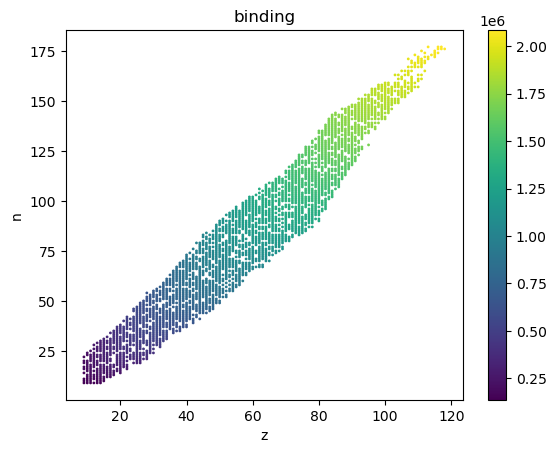

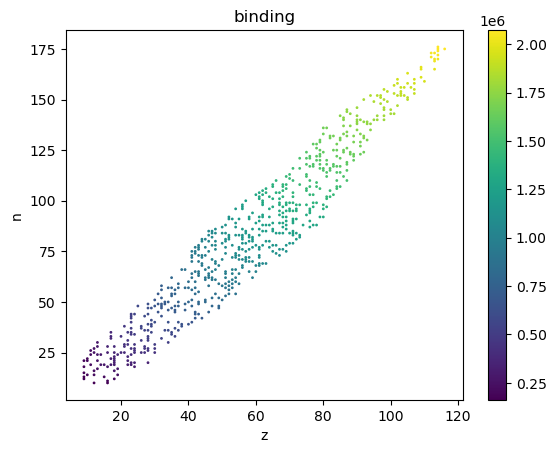

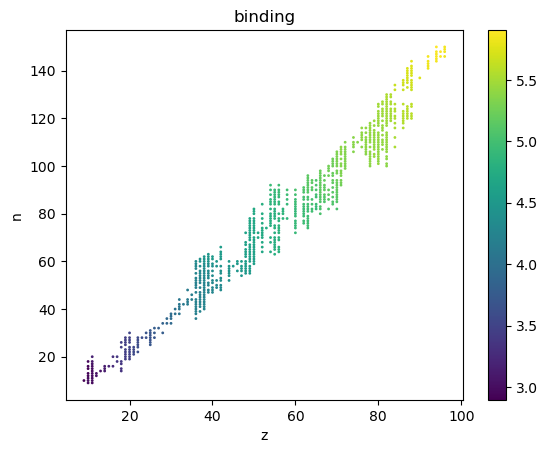

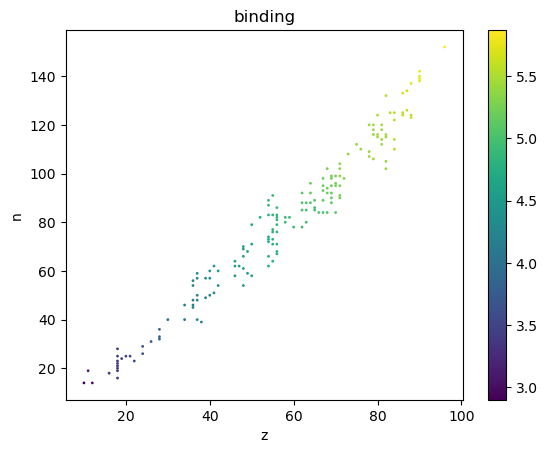

In [18]:
from matplotlib import pyplot as plt
import numpy as np

def plot_zn_vs(field, tensor_dict):
    z, n, binding = (tensor_dict[field].cpu().detach().numpy() for field in ["z", "n", field])
    eval_fn = get_eval_fn_for(field)
    inverse_transformer = data.regression_transformers[field].inverse_transform
    binding = inverse_transformer(binding)
    binding = eval_fn(binding, z, n)
    plt.scatter(z, n, c=binding, cmap="viridis", s=1)
    plt.xlabel("z")
    plt.ylabel("n")
    plt.title("binding")
    plt.colorbar()
    plt.show()
    
plot_zn_vs("binding", tensor_dict_train)
plot_zn_vs("binding", tensor_dict_valid)
plot_zn_vs("radius", tensor_dict_train)
plot_zn_vs("radius", tensor_dict_valid)